In this exercise you will implement a method for inferring the posterior probability density of the variance of thedistribution from which a set of samples were drawn. You will use Bayes' theorem to derive a posterior probabilitydistribution for this variance. You will then proceed, in a rather gratuitous application of the Metropolis-Hastingalgorithm, to sample from this posterior density to form a Markov chain. We then use the Markov chain to estimatethe posterior density. I call this application 'rather gratuitous' because we already know the posterior densityand can plot it and do anything we want with it. The utility of generating a Markov chain will become more evidentin the group project.

1) Assume a Gaussian random number generator with zero mean and variance a is producing samples, x,  with posterior density P(x|a) = N(a) e^{-x^2/(2a)}. Analytically find N(a) so that P(x|a) is appropriately normalized.

3) Use Bayes’s theorem to calculate P(a|{x}) when one has multiple samples drawn;  {x} =  (x_1, x_2, x_3, ... x_n).

4) Draw 100 samples and plot the resulting P(a|{x}).

5) Use the Metropolis Hastings algorithm to sample from this posterior and create a Markov chain.

6) Plot a "trace plot" which is sample number vs. parameter value.

7) Plot a histogram of the chain with variance a as the x axis and compare with P(a|x). Indicate in your graph the true value of the variance.

Develop in the VS Code IDE under version control on your own GitHub repo. Submit a link to the GitHub repo.



NOTE:

1) In (3), simply adopt a uniform prior, which means P(a) is independent of a.

2) In (3), you only need to calculate an un-normalized P(a|x); i.e., don't concern yourself with factors that have
no dependence on a. If you do want to normalize P(a|x) you can do so by making sure that \int da P(a|x)=1 -- but
you don't have to.

In [1]:
import numpy as np
import scipy.integrate as integrate

Define width and mean of Gaussian

In [2]:
width = 1
mean = 0

Define the gaussian with normalization, it should equal 1 when integrated over all x

In [3]:
def gaussian(x):
    return 1 / (np.sqrt(2 * np.pi) * width) * np.exp(-(x - mean) ** 2 / (2 * width))

Integrate using scipy

In [4]:
print(integrate.quad(gaussian, -np.inf, np.inf))

(0.9999999999999997, 1.017819145094224e-08)


When you have multiple samples, the probability function becomes

$ P(x_1, ..., x_n|\sigma) = \prod^{\infty}_{i=1} P(x_i|\sigma)=N^n(\sigma) e^{-\sum_i (x_i-\mu)^2/(2 \sigma^2)}$

In [14]:
# Make one hundred samples for x
data = np.random.normal(0, 1, 100)
print(f"Sample of data: {data[:5]}")

# Generate range of possible widths sigmas
sigma_range: np.ndarray = np.linspace(0.01, 5, 500)
# prior distribution P(sigma)
prior = np.ones(500)/500
print(f"{sigma_range[:5]=}")
print(f"{prior[:5]=}")

# For one Gaussian, the distribution of normalizations for sigmas is...
normalization: np.ndarray = 1/(np.sqrt(2*np.pi)*sigma_range)
print(f"{normalization[:5]=}")

# For one hundred points, do N(sigma)^n
n_normalization: np.ndarray = normalization ** 100
print(f"{n_normalization[:5]=}")

# The exponent has a sum over the squares of all the data
squared_data = [(i - mean)**2 for i in data]
sum_of_squared_data: int = sum(squared_data)
print(f"{sum_of_squared_data=}")

# Distribution of final value of exponential for all values of sigma
exponential: np.ndarray = np.exp(-sum_of_squared_data / (2*sigma_range**2))
print(f"{exponential[:5]=}")

# Multiply times normalization
likelihood: np.ndarray = n_normalization * exponential
print(f"{likelihood[:5]=}")

Sample of data: [-0.38520531  0.37420916 -1.70870709 -0.58681869  0.17578328]
sigma_range[:5]=array([0.01, 0.02, 0.03, 0.04, 0.05])
prior[:5]=array([0.002, 0.002, 0.002, 0.002, 0.002])
normalization[:5]=array([39.89422804, 19.94711402, 13.29807601,  9.97355701,  7.97884561])
n_normalization[:5]=array([1.23312352e+160, 9.72762938e+129, 2.39266067e+112, 7.67374652e+099,
       1.56316977e+090])
sum_of_squared_data=98.29057901871542
exponential[:5]=array([0., 0., 0., 0., 0.])
likelihood[:5]=array([0., 0., 0., 0., 0.])


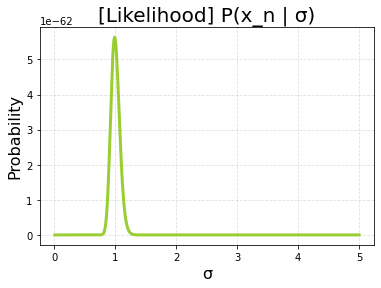

In [15]:
from matplotlib import pyplot as plt

# Create the plot
fig1, ax1 = plt.subplots()
ax1.plot(sigma_range, likelihood, linewidth=3, color='yellowgreen')

# Add a title
ax1.set_title('[Likelihood] P(x_n | σ)' , fontsize=20)

# Add X and y Label
ax1.set_xlabel("σ", fontsize=16)
ax1.set_ylabel("Probability", fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')

# Show the plot
plt.show()
# Centered at 0.3

In [19]:
def create_posterior(_likelihood, _prior):
    posterior = _likelihood * _prior # element-wise multiplication
    second_normalization = np.sum(posterior)
    print(f"{second_normalization=}")
    normalized_posterior = posterior / np.sum(posterior)

    max_bin = np.argmax(posterior)
    print(f"Max bin: {max_bin}\nMax posterior probability: {posterior[max_bin]}\n"
          f"Sigma value at max bin: {sigma_range[max_bin]}")
    return posterior
posterior = create_posterior(likelihood, prior)

second_normalization=1.9977980950930246e-63
Max bin: 98
Max posterior probability: 1.1262349460618086e-64
Sigma value at max bin: 0.99


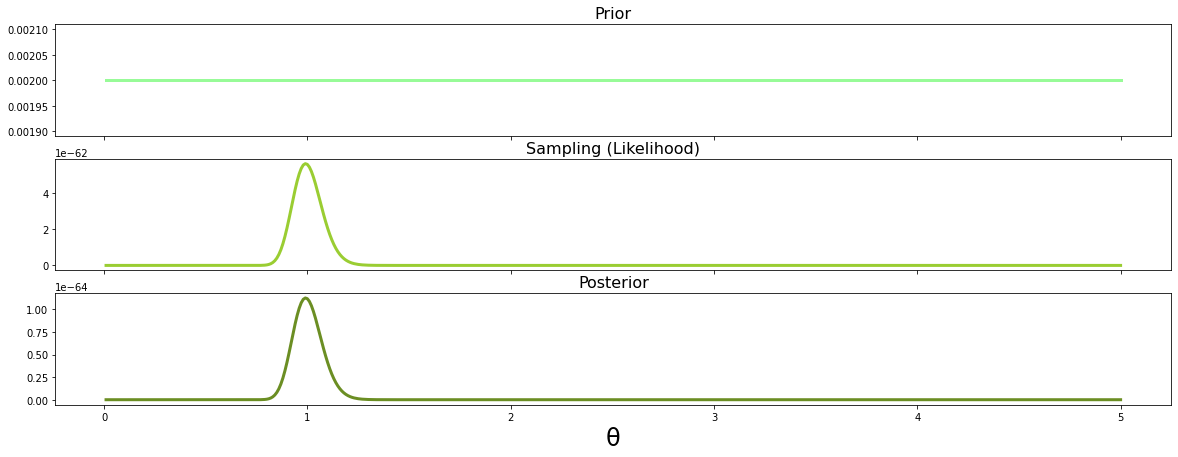

In [20]:
def plot_together(_posterior, _likelihood, _prior):
    # Plotting all three together
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
    plt.xlabel('θ', fontsize=24)

    axes[0].plot(sigma_range, _prior, label="Prior", linewidth=3, color='palegreen')
    axes[0].set_title("Prior", fontsize=16)

    axes[1].plot(sigma_range, _likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
    axes[1].set_title("Sampling (Likelihood)", fontsize=16)

    axes[2].plot(sigma_range, _posterior, label='Posterior', linewidth=3, color='olivedrab')
    axes[2].set_title("Posterior", fontsize=16)
    plt.show()

plot_together(posterior, likelihood, prior)